<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [34]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



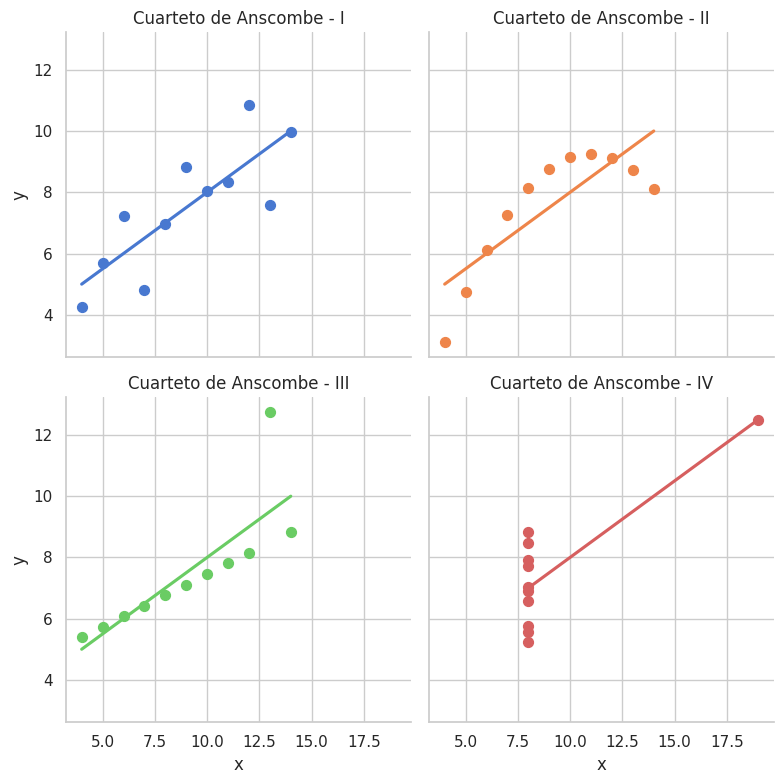

In [35]:
g = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=data, col_wrap=2, ci=None, palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})
g.set_titles("Cuarteto de Anscombe - {col_name}")
plt.show()

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [36]:
description = data.groupby('dataset').describe()
display(description)

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

La media, la desviación estándar y el conteo tanto para 'x' como para 'y' son casi idénticos en los cuatro grupos. Estas estadísticas resumidas por sí solas no cuentan toda la historia sobre la distribución de los datos o la relación entre las variables.

Si bien las medidas básicas son similares, al observar de cerca otras estadísticas como el mínimo, el máximo y los cuartiles, se pueden intuir algunas diferencias, aunque estas son mucho más evidentes en las visualizaciones.
*   Los conjuntos de datos I y II muestran un rango más amplio de valores de x (de 4 a 14), mientras que el conjunto de datos IV tiene la mayoría de los valores de x en 8, con un valor atípico en 19.
*   Los valores mínimo y máximo para y también muestran cierta variación entre los conjuntos de datos, lo que refleja las diferentes distribuciones observadas en los gráficos de dispersión.

Confiar únicamente en estas estadísticas descriptivas agregadas llevaría a la conclusión incorrecta de que los cuatro conjuntos de datos son muy similares. Esto refuerza la importancia de visualizar los datos para comprender su verdadera naturaleza y la relación entre las variables, especialmente antes de aplicar modelos como la regresión lineal.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



Dataset: I
  Coeficiente (pendiente): 0.50
  Intercepto: 3.00
  Error cuadrático medio (MSE): 1.25
  Coeficiente de determinación (R²): 0.67


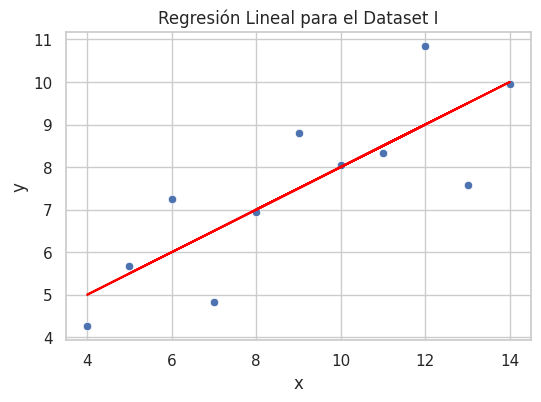

------------------------------
Dataset: II
  Coeficiente (pendiente): 0.50
  Intercepto: 3.00
  Error cuadrático medio (MSE): 1.25
  Coeficiente de determinación (R²): 0.67


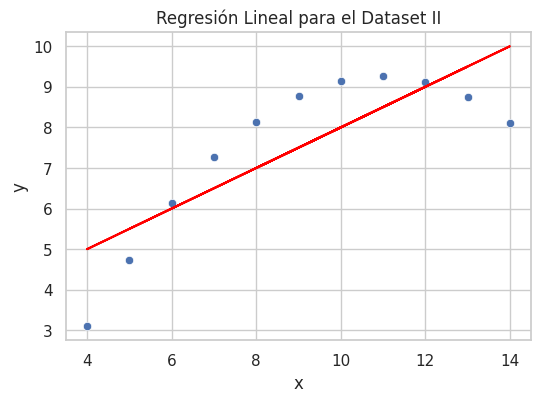

------------------------------
Dataset: III
  Coeficiente (pendiente): 0.50
  Intercepto: 3.00
  Error cuadrático medio (MSE): 1.25
  Coeficiente de determinación (R²): 0.67


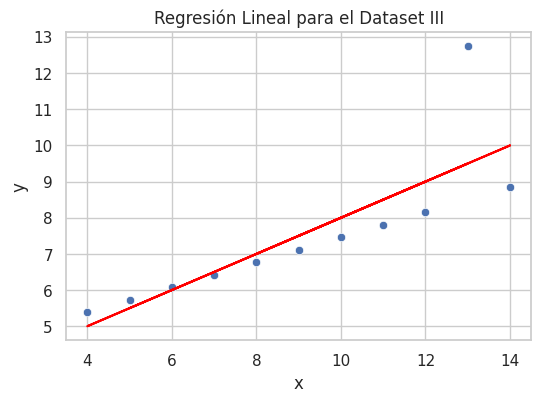

------------------------------
Dataset: IV
  Coeficiente (pendiente): 0.50
  Intercepto: 3.00
  Error cuadrático medio (MSE): 1.25
  Coeficiente de determinación (R²): 0.67


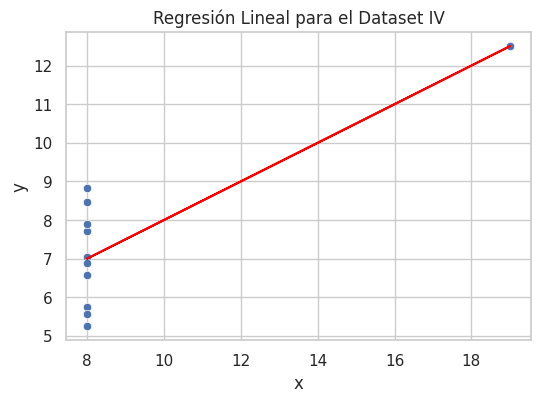

------------------------------


In [59]:
# Ajustar modelos de regresión lineal y evaluar

for dataset_name in data['dataset'].unique():
    # Filtrar datos por grupo
    dataset = data[data['dataset'] == dataset_name]

    # Definir X e y
    X = dataset[['x']]
    y = dataset['y']

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Imprimir resultados
    print(f"Dataset: {dataset_name}")
    print(f"  Coeficiente (pendiente): {model.coef_[0]:.2f}")
    print(f"  Intercepto: {model.intercept_:.2f}")
    print(f"  Error cuadrático medio (MSE): {mse:.2f}")
    print(f"  Coeficiente de determinación (R²): {r2:.2f}")

    # Graficar los resultados
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='x', y='y', data=dataset)
    plt.plot(X, y_pred, color='red')
    plt.title(f'Regresión Lineal para el Dataset {dataset_name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    print("-" * 30)

El Dataset I Muestra una relación lineal clara y bien distribuida, con un MSE moderado y R² aceptable (0.6665), luego el modelo captura adecuadamente la tendencia general.

En el Dataset II, aunque las métricas son similares al Dataset I, visualmente se aprecia una relación no lineal, y entonces no es adecuado para esta relación que es curvilínea. Las métricas no reflejan la verdadera naturaleza de los datos.

El Dataset III presenta un outlier que afecta significativamente el ajuste, de hecho la línea de regresión se ve influenciada por este punto atípico, y las métricas no capturan la distorsión que produce el outlier.

En el Dataset IV el único punto diferente determina completamente la pendiente, luego las métricas no reflejan la naturaleza problemática de estos datos.

Se concluye que las métricas tradicionales (MSE y R²) son insuficientes para evaluar la calidad real del modelo, pues Datasets con métricas similares pueden tener comportamientos radicalmente diferentes. Es fundamental complementar las métricas con análisis visuales.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

# Task
Analyze the Anscombe's quartet datasets. Create scatter plots for each group with appropriate titles. Generate a statistical summary using `describe`. Fit a linear regression model using `sklearn` for each group, calculate evaluation metrics (MSE, R²), and visualize the results. Interpret the visualizations, statistical summaries, and regression results in Spanish within text boxes, highlighting significant differences and characteristics. Identify strategies to improve the model fit for unsuitable groups (II, III, and IV), implement alternative models or outlier handling as needed, and evaluate and visualize the improved models. Finally, summarize the findings in Spanish within a text box.

## Analyze unsuitable datasets

### Subtask:
Revisit the visualizations and linear regression results for Datasets II, III, and IV to understand the specific issues in each (non-linearity, outliers, etc.).


## Propose strategies

### Subtask:
Based on the analysis, propose specific strategies for each unsuitable dataset. This could include:
- For Dataset II (non-linear): Consider polynomial regression.
- For Dataset III (outlier): Identify and handle the outlier (e.g., removal or robust regression).
- For Dataset IV (vertical cluster with outlier): Discuss the limitations of simple linear models and potentially demonstrate outlier handling.


**Reasoning**:
Describe the issues with linear regression for datasets II, III, and IV and propose strategies for improving the model fit for each in a markdown cell.



In [61]:
%%markdown
A partir de los gráficos de dispersión y los resultados de la regresión lineal de cada Dataset, se observan los siguientes problemas:

*   **Dataset II:** La relación entre x e y es claramente no lineal, presentando una forma curvilínea.

*   **Dataset III:** La mayoría de los puntos exhiben una relación lineal, pero la presencia de un punto atípico (outlier) influye fuertemente en la línea de regresión, desviándola del patrón principal de los datos. Esto distorsiona el ajuste del modelo y las métricas de evaluación.

*   **Dataset IV:** Los puntos de datos se agrupan verticalmente en un valor de x, con un único punto atípico con un valor de x diferente.

Para mejorar el ajuste del modelo para estos datasets, se proponen lo siguiente:

*   **Dataset II:** Se podría utilizar un modelo de **regresión polinomial** para capturar la relación no lineal.

*   **Dataset III:** Se podría **identificar y manejar el outlier**. Eliminar el outlier si se considera que es un error de medición o si no representa el comportamiento típico de los datos.

*   **Dataset IV:** Si el objetivo es modelar el grupo principal de puntos, se podría **excluir el outlier** y analizar el clúster vertical. Si se necesita incluir el outlier, se podrían considerar modelos que puedan manejar datos con estructuras no lineales o agrupaciones.

A partir de los gráficos de dispersión y los resultados de la regresión lineal de cada Dataset, se observan los siguientes problemas:

*   **Dataset II:** La relación entre x e y es claramente no lineal, presentando una forma curvilínea.

*   **Dataset III:** La mayoría de los puntos exhiben una relación lineal, pero la presencia de un punto atípico (outlier) influye fuertemente en la línea de regresión, desviándola del patrón principal de los datos. Esto distorsiona el ajuste del modelo y las métricas de evaluación.

*   **Dataset IV:** Los puntos de datos se agrupan verticalmente en un valor de x, con un único punto atípico con un valor de x diferente.

Para mejorar el ajuste del modelo para estos datasets, se proponen lo siguiente:

*   **Dataset II:** Se podría utilizar un modelo de **regresión polinomial** para capturar la relación no lineal.

*   **Dataset III:** Se podría **identificar y manejar el outlier**. Eliminar el outlier si se considera que es un error de medición o si no representa el comportamiento típico de los datos.

*   **Dataset IV:** Si el objetivo es modelar el grupo principal de puntos, se podría **excluir el outlier** y analizar el clúster vertical. Si se necesita incluir el outlier, se podrían considerar modelos que puedan manejar datos con estructuras no lineales o agrupaciones.


## Implement chosen strategies

### Subtask:
Implement the chosen strategies for each relevant dataset (II, III, and IV).


**Reasoning**:
Implement the proposed strategies for Datasets II, III, and IV: polynomial regression for Dataset II and outlier removal followed by linear regression for Datasets III and IV.



Dataset: II (Regresión Polinómica)
  Error cuadrático medio (MSE): 0.00
  Coeficiente de determinación (R²): 1.00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


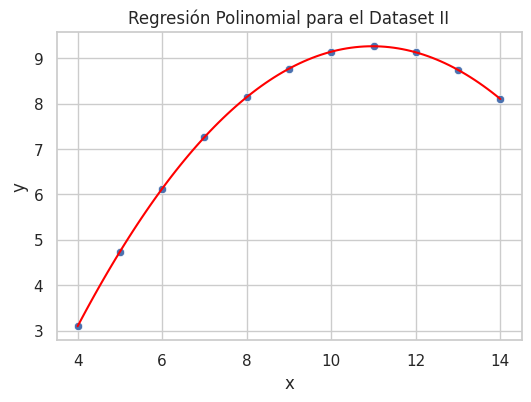

------------------------------
Dataset: III (Outlier Removido + Regresión Lineal)
  Coeficiente (pendiente): 0.35
  Intercepto: 4.01
  Error cuadrático medio (MSE): 0.00
  Coeficiente de determinación (R²): 1.00


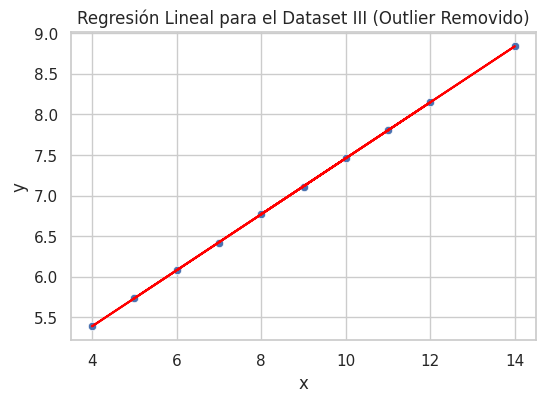

------------------------------
Dataset: IV (Outlier Removido + Regresión Lineal)
  Coeficiente (pendiente): 0.00
  Intercepto: 7.00
  Error cuadrático medio (MSE): 1.37
  Coeficiente de determinación (R²): 0.00


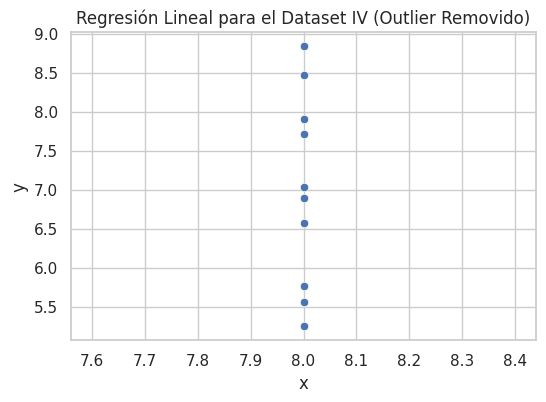

------------------------------


In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Conjunto II: Regresión polinómica
dataset_II = data[data['dataset'] == 'II'].copy()
X_II = dataset_II[['x']]
y_II = dataset_II['y']

# Crear características polinómicas (grado 2)
poly_features = PolynomialFeatures(degree=2)
X_II_poly = poly_features.fit_transform(X_II)

# Entrenar modelo de regresión polinómica
model_poly = LinearRegression()
model_poly.fit(X_II_poly, y_II)
y_pred_poly = model_poly.predict(X_II_poly)

# Evaluar modelo polinómico
mse_poly = mean_squared_error(y_II, y_pred_poly)
r2_poly = r2_score(y_II, y_pred_poly)

print("Dataset: II (Regresión Polinómica)")
print(f"  Error cuadrático medio (MSE): {mse_poly:.2f}")
print(f"  Coeficiente de determinación (R²): {r2_poly:.2f}")

# Graficar resultados de la regresión polinómica
plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=dataset_II)
# Graficar la curva
x_plot = np.linspace(X_II['x'].min(), X_II['x'].max(), 100).reshape(-1, 1)
x_plot_poly = poly_features.transform(x_plot)
y_plot_poly = model_poly.predict(x_plot_poly)
plt.plot(x_plot, y_plot_poly, color='red')
plt.title('Regresión Polinomial para el Dataset II')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("-" * 30)


# Conjunto III: Eliminación de outlier + Regresión lineal
dataset_III = data[data['dataset'] == 'III'].copy()
# Identificar y eliminar outlier visualmente a partir de las gráficas anteriores (x=13, y=12.74)
outlier_III_index = dataset_III[(dataset_III['x'] == 13) & (dataset_III['y'] == 12.74)].index
dataset_III_cleaned = dataset_III.drop(outlier_III_index)

X_III_cleaned = dataset_III_cleaned[['x']]
y_III_cleaned = dataset_III_cleaned['y']

# Entrenar modelo de regresión lineal con los datos limpiados
model_III_cleaned = LinearRegression()
model_III_cleaned.fit(X_III_cleaned, y_III_cleaned)
y_pred_III_cleaned = model_III_cleaned.predict(X_III_cleaned)

# Evaluar modelo limpiado
mse_III_cleaned = mean_squared_error(y_III_cleaned, y_pred_III_cleaned)
r2_III_cleaned = r2_score(y_III_cleaned, y_pred_III_cleaned)

print("Dataset: III (Outlier Removido + Regresión Lineal)")
print(f"  Coeficiente (pendiente): {model_III_cleaned.coef_[0]:.2f}")
print(f"  Intercepto: {model_III_cleaned.intercept_:.2f}")
print(f"  Error cuadrático medio (MSE): {mse_III_cleaned:.2f}")
print(f"  Coeficiente de determinación (R²): {r2_III_cleaned:.2f}")

# Graficar resultados de la regresión con datos limpiados
plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=dataset_III_cleaned)
plt.plot(X_III_cleaned, y_pred_III_cleaned, color='red')
plt.title('Regresión Lineal para el Dataset III (Outlier Removido)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("-" * 30)


# Conjunto IV: Eliminación de outlier + Regresión lineal
dataset_IV = data[data['dataset'] == 'IV'].copy()
# Identificar y eliminar outlier visualmente a partir de las gráficas anteriores (x=19, y=12.50)
outlier_IV_index = dataset_IV[(dataset_IV['x'] == 19) & (dataset_IV['y'] == 12.50)].index
dataset_IV_cleaned = dataset_IV.drop(outlier_IV_index)

X_IV_cleaned = dataset_IV_cleaned[['x']]
y_IV_cleaned = dataset_IV_cleaned['y']

# Entrenar modelo de regresión lineal con los datos limpiados
model_IV_cleaned = LinearRegression()
model_IV_cleaned.fit(X_IV_cleaned, y_IV_cleaned)
y_pred_IV_cleaned = model_IV_cleaned.predict(X_IV_cleaned)

# Evaluar modelo limpiado
mse_IV_cleaned = mean_squared_error(y_IV_cleaned, y_pred_IV_cleaned)
r2_IV_cleaned = r2_score(y_IV_cleaned, y_pred_IV_cleaned)

print("Dataset: IV (Outlier Removido + Regresión Lineal)")
print(f"  Coeficiente (pendiente): {model_IV_cleaned.coef_[0]:.2f}")
print(f"  Intercepto: {model_IV_cleaned.intercept_:.2f}")
print(f"  Error cuadrático medio (MSE): {mse_IV_cleaned:.2f}")
print(f"  Coeficiente de determinación (R²): {r2_IV_cleaned:.2f}")

# Graficar resultados de la regresión con datos limpiados
plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=dataset_IV_cleaned)
plt.plot(X_IV_cleaned, y_pred_IV_cleaned, color='red')
plt.title('Regresión Lineal para el Dataset IV (Outlier Removido)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("-" * 30)